In [1]:
import os
import json

def get_data(folder_name):
    x = []
    y = []
    positions = []
    file_names = []

    for file in os.listdir(folder_name):
        if file.endswith(".txt"):
            file_name = os.path.join(folder_name, file[:-4])

            file_text = open(file_name + '.txt', encoding='utf8')
            try:
                file_truth = open(file_name + '.truth', encoding='utf8')

                try:
                    text = file_text.read()
                    truth = json.load(file_truth)
                    truth_changes = truth['changes']
                    truth_positions = truth['positions']

                    x.append(text)
                    y.append(truth_changes)
                    positions.append(truth_positions)
                    file_names.append(file[:-4])
                finally:
                    file_truth.close()
            finally:
                file_text.close()

    return x, y, positions, file_names

In [2]:
import pandas as pd
from nltk.tokenize import sent_tokenize

TRAINING_DIR = '../data/training'

X, y, positions, file_names = get_data(
    TRAINING_DIR)
df = pd.DataFrame(data={'text': X, 'label': y, 'filename': file_names, 'pos':positions})
df['num_sent'] = [len(sent_tokenize(d)) for d in df.text]
df['num_splits'] = [len(x) for x in df.pos]

In [3]:
df.head()

,filename,label,pos,text,num_sent,num_splits
0,problem-1410,True,"[1683, 2890]",Make up some more tasks and add them to the qu...,32,2
1,problem-2252,False,[],"Yes, there were extensive rapes by American so...",44,0
2,problem-184,False,[],Observers highlight key things that are occurr...,27,0
3,problem-42,False,[],TL;DR Much of Scrum's value to an organization...,38,0
4,problem-2814,False,[],Origen believed (Contra Celsum 8) that while C...,29,0


In [4]:
names = ['digits', 'punctuation_count', 'comma_count', 'semicolon_count', 'colon_count', \
        'pronouns', 'prepositions', 'coordinating_conjunctions', 'adjectives', 'adverbs', \
         'determiners', 'interjections', 'modals', 'nouns', 'personal_pronouns', 'verbs', \
         'mean_word_length', 'word_len_gte_six', 'word_len_two_and_three',
        'question_sentences', 'short_sentences', 'long_sentences', 'mean_sentence_length']

In [10]:
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag

def lexical_chars(df):    
    for i, entry in enumerate(df.text):
        chars = list(entry)        
        char_count = len(chars)
        
        df.iloc[i,df.columns.get_loc('digits')]=sum(c.isdigit() for c in chars)/char_count
        df.iloc[i,df.columns.get_loc('punctuation_count')]= \
            sum(c in '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~' for c in chars) / char_count
        df.iloc[i,df.columns.get_loc('comma_count')]= chars.count(',')/ char_count
        df.iloc[i,df.columns.get_loc('semicolon_count')]=chars.count(';') / char_count
        df.iloc[i,df.columns.get_loc('colon_count')]=chars.count(':') / char_count

def lexical_words(df):
    for i, entry in enumerate(df.text):
        words = word_tokenize(entry)
        words_tagged = pos_tag(words)        
        word_count = len(words_tagged)
        
        df.iloc[i,df.columns.get_loc('personal_pronouns')]=sum(t[1] in ['PRP'] for t in words_tagged)/word_count        
        df.iloc[i,df.columns.get_loc('adjectives')]=sum(t[1].startswith('J') for t in words_tagged)/word_count        
        df.iloc[i,df.columns.get_loc('nouns')]=sum(t[1].startswith('N') for t in words_tagged)/word_count        
        df.iloc[i,df.columns.get_loc('verbs')]=sum(t[1].startswith('V') for t in words_tagged)/word_count        
        df.iloc[i,df.columns.get_loc('pronouns')]=sum(t[1] in ['PRP', 'PRP$', 'WP', 'WP$'] for t in words_tagged)/word_count        
        df.iloc[i,df.columns.get_loc('prepositions')]=sum(t[1] in ['IN'] for t in words_tagged)/word_count        
        df.iloc[i,df.columns.get_loc('coordinating_conjunctions')]=sum(t[1] in ['CC'] for t in words_tagged)/word_count        
        df.iloc[i,df.columns.get_loc('adverbs')]=sum(t[1] in ['RB', 'RBR', 'RBS'] for t in words_tagged)/word_count        
        df.iloc[i,df.columns.get_loc('determiners')]=sum(t[1] in ['DT', 'PDT', 'WDT'] for t in words_tagged)/word_count
        df.iloc[i,df.columns.get_loc('interjections')]=sum(t[1] in ['UH'] for t in words_tagged)/word_count  
        df.iloc[i,df.columns.get_loc('modals')]=sum(t[1] in ['MD'] for t in words_tagged)/word_count  
        df.iloc[i,df.columns.get_loc('word_len_gte_six')]=sum(len(w) >= 6 for w in words)/word_count  
        df.iloc[i,df.columns.get_loc('word_len_two_and_three')]=sum(len(w) in [2, 3] for w in words)/word_count  
        df.iloc[i,df.columns.get_loc('mean_word_length')]=sum(len(w) for w in words)/word_count


def lexical_sentences(df):
    for i, entry in enumerate(df.text):
        sentences = sent_tokenize(entry)
        sent_count = len(sentences)
        
        df.iloc[i,df.columns.get_loc('question_sentences')]=sum(s[len(s) - 1] == '?' for s in sentences)/sent_count
        df.iloc[i,df.columns.get_loc('short_sentences')]=sum(len(s) <= 100 for s in sentences)/sent_count
        df.iloc[i,df.columns.get_loc('long_sentences')]=sum(len(s) >= 200 for s in sentences)/sent_count
        df.iloc[i,df.columns.get_loc('mean_sentence_length')]=sum(len(s) for s in sentences)/sent_count

def lexical(df):
    for n in names:
        df[n] = np.zeros(len(df.text))
        
    lexical_chars(df)
    lexical_words(df)
    lexical_sentences(df)

In [11]:
lexical(df)

In [12]:
df.head()

,filename,label,pos,text,num_sent,num_splits,digits,punctuation_count,comma_count,semicolon_count,...,nouns,personal_pronouns,verbs,mean_word_length,word_len_gte_six,word_len_two_and_three,question_sentences,short_sentences,long_sentences,mean_sentence_length
0,problem-1410,True,"[1683, 2890]",Make up some more tasks and add them to the qu...,32,2,0.001576,0.028361,0.004989,0.000000,...,0.214286,0.059740,0.168831,4.031169,0.248052,0.353247,0.218750,0.500000,0.156250,117.093750
1,problem-2252,False,[],"Yes, there were extensive rapes by American so...",44,0,0.016816,0.028827,0.008080,0.000437,...,0.290210,0.018648,0.102564,4.460373,0.320513,0.300699,0.000000,0.522727,0.022727,102.340909
2,problem-184,False,[],Observers highlight key things that are occurr...,27,0,0.003339,0.020451,0.005426,0.000000,...,0.192385,0.078156,0.178357,3.877756,0.208417,0.370741,0.037037,0.703704,0.000000,87.333333
3,problem-42,False,[],TL;DR Much of Scrum's value to an organization...,38,0,0.001121,0.025603,0.009157,0.000748,...,0.272547,0.018831,0.144698,4.439049,0.290387,0.337958,0.000000,0.315789,0.131579,139.842105
4,problem-2814,False,[],Origen believed (Contra Celsum 8) that while C...,29,0,0.006353,0.033990,0.012389,0.000953,...,0.275920,0.016722,0.118729,4.436455,0.316054,0.277592,0.000000,0.482759,0.137931,107.241379


/home/didi/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 432x288 with 0 Axes>

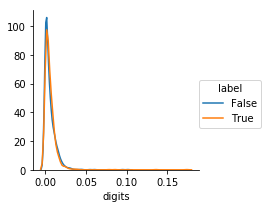

<Figure size 432x288 with 0 Axes>

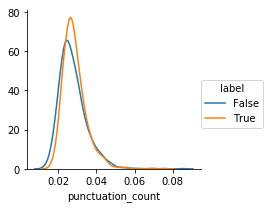

<Figure size 432x288 with 0 Axes>

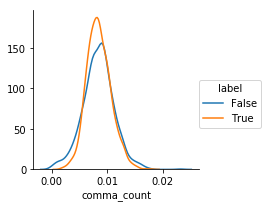

<Figure size 432x288 with 0 Axes>

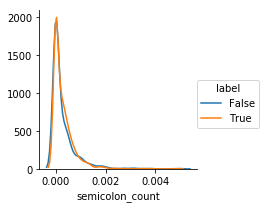

<Figure size 432x288 with 0 Axes>

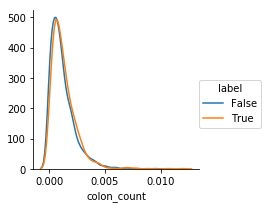

<Figure size 432x288 with 0 Axes>

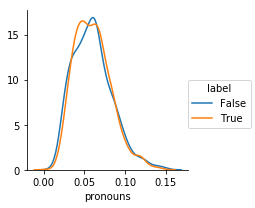

<Figure size 432x288 with 0 Axes>

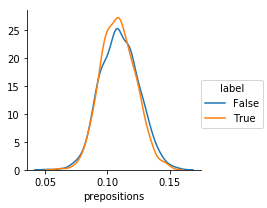

<Figure size 432x288 with 0 Axes>

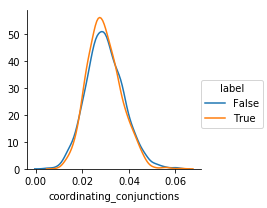

<Figure size 432x288 with 0 Axes>

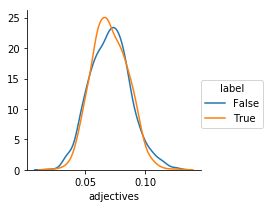

<Figure size 432x288 with 0 Axes>

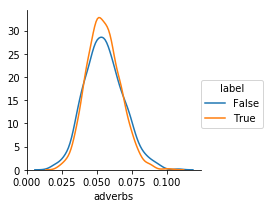

<Figure size 432x288 with 0 Axes>

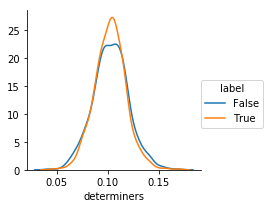

<Figure size 432x288 with 0 Axes>

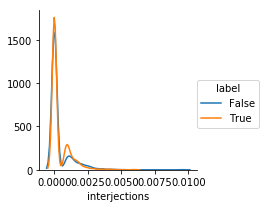

<Figure size 432x288 with 0 Axes>

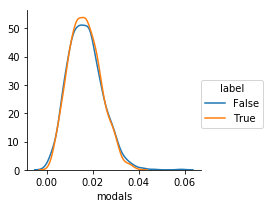

<Figure size 432x288 with 0 Axes>

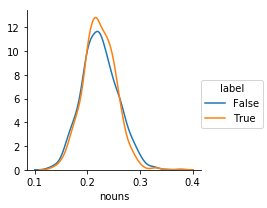

<Figure size 432x288 with 0 Axes>

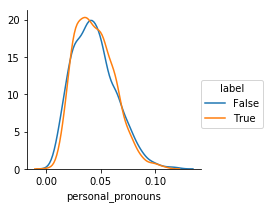

<Figure size 432x288 with 0 Axes>

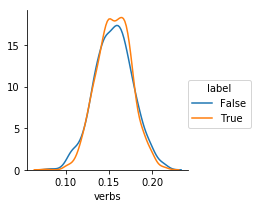

<Figure size 432x288 with 0 Axes>

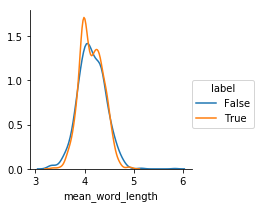

<Figure size 432x288 with 0 Axes>

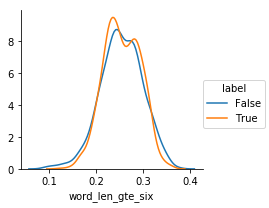

<Figure size 432x288 with 0 Axes>

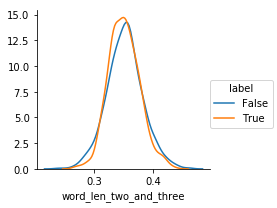

<Figure size 432x288 with 0 Axes>

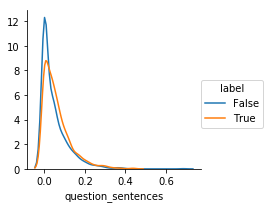

<Figure size 432x288 with 0 Axes>

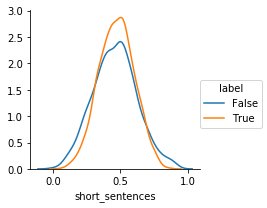

<Figure size 432x288 with 0 Axes>

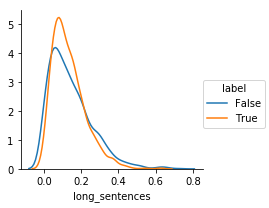

<Figure size 432x288 with 0 Axes>

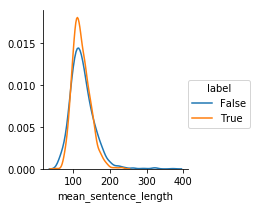

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
for name in names:
    plt.figure()
    sns.FacetGrid(df, hue="label") \
       .map(sns.kdeplot, name) \
       .add_legend()